# Ejemplo de QDA

In [1]:
# Bibliotecas a utilizar 
import numpy                   as np      # Uso de álgebra lineal, funciones vectoriales
import pandas                  as pd      # Trabajar con DataFrames
import matplotlib.pyplot       as plt     # Para realizar gráficas
import seaborn                 as sns     # Otras funciones para graficar
 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis    as LDA        # Modelo LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA        # Modelo QDA
from sklearn.metrics               import accuracy_score     # Función para calcular la precisión de clasificación
from sklearn.metrics               import confusion_matrix   # Función para calcular una matriz de confusión
from sklearn.model_selection       import KFold              # Función para realizar K-Fold Cross Validation
from sklearn.model_selection       import cross_val_score    # Función para realizar K-Fold-Cross Validation 

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Leemos nuestros archivos 
datos = pd.read_csv("iris.csv")   # Datos con 3 clases
#datos = pd.read_csv("rock.csv")   # Datos con 12 clases
datos.sample(10)

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width     Species
141           6.9          3.1           5.1          2.3   virginica
140           6.7          3.1           5.6          2.4   virginica
60            5.0          2.0           3.5          1.0  versicolor
129           7.2          3.0           5.8          1.6   virginica
127           6.1          3.0           4.9          1.8   virginica
108           6.7          2.5           5.8          1.8   virginica
20            5.4          3.4           1.7          0.2      setosa
145           6.7          3.0           5.2          2.3   virginica
125           7.2          3.2           6.0          1.8   virginica
40            5.0          3.5           1.3          0.3      setosa

[]

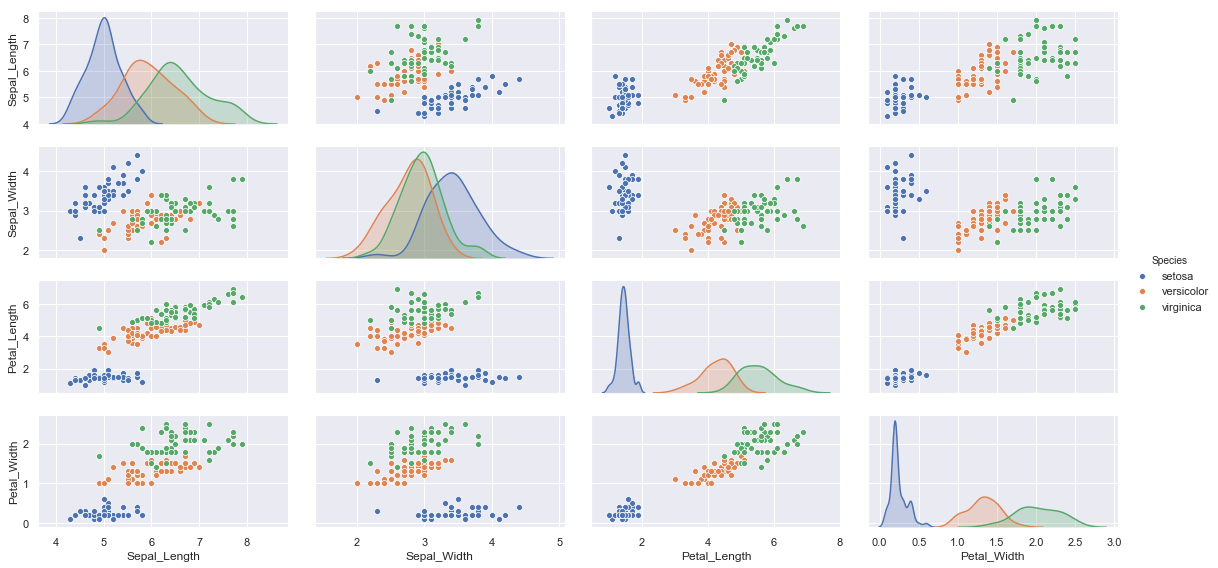

In [3]:
sns.pairplot(datos, hue = "Species", height=2, aspect=2)
plt.plot()

In [4]:
matriz_diseño = datos.iloc[:,0:4]
y_real        = datos.iloc[:,  4]
matriz_diseño.head()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [5]:
modelo_qda = QDA(priors=None,reg_param=0.0, store_covariance=False,tol=0.0001,store_covariances=None)
modelo_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [6]:
modelo_qda.fit( X = matriz_diseño, y = y_real )
y_estimada = modelo_qda.predict( X = matriz_diseño )
y_estimada[0:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [7]:
matriz_confusion = confusion_matrix( y_real, y_estimada )
matriz_confusion

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [8]:
print( "Precisión: ", accuracy_score( y_true = y_real, y_pred = y_estimada ) )

Precisión:  0.98


In [9]:
modelo_qda = QDA(priors=None,reg_param=0.0, store_covariance=False,tol=0.0001,store_covariances=None)
k_fold     = KFold(n_splits=10, shuffle=True, random_state=0)
score      = cross_val_score( modelo_qda, matriz_diseño, y_real, cv=k_fold, n_jobs=1, scoring="accuracy")
print( "Precisiones: ",       score )
print( "Precisión puntual: ", np.mean(score) )

Precisiones:  [1.         1.         0.93333333 0.93333333 1.         0.93333333
 1.         1.         1.         0.93333333]
Precisión puntual:  0.9733333333333334
